In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

from deap import base, creator, tools, algorithms

In [2]:
###############################################################################
#                             1. TASK (1D)                                    #
#    Minimization of the function y(x) = sin(|x|) + cos(|x|) on [-4;1]       #
###############################################################################

# ----------------------------------------------------------------------------
# 1) Objective Function y(x)
#    y(x) = sin(|x|) + cos(|x|)
# ----------------------------------------------------------------------------
def func1(individual):
    """
    Objective function for 1D minimization.

    :param individual: List representing an individual, individual[0] = x
    :return: Tuple containing the value of y(x)
    """
    x = individual[0]
    y = np.sin(np.abs(x)) + np.cos(np.abs(x))
    return (y,)



In [3]:
# ----------------------------------------------------------------------------
# 2) Creating Classes for Minimization Task (FitnessMin, Individual1D)
# ----------------------------------------------------------------------------
# Check if classes are already created to avoid errors during repeated runs
if not hasattr(creator, "FitnessMin1D"):
    creator.create("FitnessMin1D", base.Fitness, weights=(-1.0,))  # -1 => Minimization
if not hasattr(creator, "Individual1D"):
    creator.create("Individual1D", list, fitness=creator.FitnessMin1D)

toolbox_1d = base.Toolbox()

# Search space parameters (x ∈ [-4;1])
BOUND_LOW_1D, BOUND_UP_1D = -4.0, 1.0


# Initialization of an individual: one float within [BOUND_LOW_1D, BOUND_UP_1D]
def random_float_1d():
    return [random.uniform(BOUND_LOW_1D, BOUND_UP_1D)]


# Registering in the toolbox the functions to create individuals and populations
toolbox_1d.register("attr_float", random_float_1d)
toolbox_1d.register("individual", tools.initIterate, creator.Individual1D,
                    toolbox_1d.attr_float)
toolbox_1d.register("population", tools.initRepeat, list,
                    toolbox_1d.individual)

# Registering the fitness function, crossover, mutation, and selection operators
toolbox_1d.register("evaluate", func1)
# Crossover (Blend Crossover for float)
toolbox_1d.register("mate", tools.cxBlend, alpha=0.5)
# Mutation: Gaussian mutation with sigma=0.2; mutation probability for each gene indpb=0.2
toolbox_1d.register("mutate", tools.mutGaussian, mu=0, sigma=0.2, indpb=0.2)
# Selection: Tournament selection with tournament size 3
toolbox_1d.register("select", tools.selTournament, tournsize=3)


# Function to enforce bounds on the genes
def limit_bounds_1d(individual, lower, upper):
    """
    Ensures that each gene in the individual stays within the specified bounds.

    :param individual: The individual to check
    :param lower: Lower bound
    :param upper: Upper bound
    :return: The individual with genes bounded within [lower, upper]
    """
    for i in range(len(individual)):
        if individual[i] < lower:
            individual[i] = lower
        elif individual[i] > upper:
            individual[i] = upper
    return individual


def main_ga_1d(pop_size=10, n_gen=100, seed=None):
    """
    Runs the Genetic Algorithm for minimizing the 1D function y(x).

    :param pop_size: Population size (default=10)
    :param n_gen: Number of generations (default=100)
    :param seed: Seed for random number generator (default=42)
    :return: Best individual found
    """
    if seed is not None:
        random.seed(seed)
    else:
        random.seed()

    # Initialize population
    pop = toolbox_1d.population(n=pop_size)

    # Crossover and mutation probabilities
    CXPB, MUTPB = 0.5, 0.2

    # Main GA loop
    for gen in range(n_gen):
        # Selection of parents
        offspring = toolbox_1d.select(pop, len(pop))
        offspring = list(map(toolbox_1d.clone, offspring))

        # Crossover
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox_1d.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        # Mutation
        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox_1d.mutate(mutant)
                del mutant.fitness.values

        # Enforce bounds after crossover and mutation
        for child in offspring:
            limit_bounds_1d(child, BOUND_LOW_1D, BOUND_UP_1D)

        # Evaluate the individuals with invalid fitness
        invalid_inds = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox_1d.map(toolbox_1d.evaluate, invalid_inds)
        for ind, fit in zip(invalid_inds, fitnesses):
            ind.fitness.values = fit

        # Replace the old population with the new offspring
        pop[:] = offspring

    # Select the best individual
    best_ind = tools.selBest(pop, 1)[0]
    best_x = best_ind[0]
    best_y = best_ind.fitness.values[0]

    print("=== RESULT (Task 1D) ===")
    print(f"Best individual: x = {best_x:.6f}")
    print(f"Function value y(x): {best_y:.6f}\n")

    return best_ind

In [4]:
###############################################################################
#                             2. TASK (2D)                                    #
#       Maximization of the function z(x,y) = x * sin(y) on [-1;3]x[-1;3]   #
###############################################################################

# ----------------------------------------------------------------------------
# 1) Objective Function z(x,y)
#    z(x,y) = x * sin(y)
# ----------------------------------------------------------------------------
def func2(individual):
    """
    Objective function for 2D maximization.

    :param individual: List representing an individual, individual[0] = x, individual[1] = y
    :return: Tuple containing the value of z(x,y)
    """
    x, y = individual[0], individual[1]
    z = x * np.sin(y)
    return (z,)



In [5]:
# ----------------------------------------------------------------------------
# 2) Creating Classes for Maximization Task (FitnessMax, Individual2D)
# ----------------------------------------------------------------------------
# Check if classes are already created to avoid errors during repeated runs
if not hasattr(creator, "FitnessMax2D"):
    creator.create("FitnessMax2D", base.Fitness, weights=(1.0,))  # 1 => Maximization
if not hasattr(creator, "Individual2D"):
    creator.create("Individual2D", list, fitness=creator.FitnessMax2D)

toolbox_2d = base.Toolbox()

# Search space parameters (x,y ∈ [-1;3])
BOUND_LOW_2D, BOUND_UP_2D = -1.0, 3.0


# Initialization of an individual: two floats within [BOUND_LOW_2D, BOUND_UP_2D]
def random_float_2d():
    return [
        random.uniform(BOUND_LOW_2D, BOUND_UP_2D),
        random.uniform(BOUND_LOW_2D, BOUND_UP_2D)
    ]


# Registering in the toolbox the functions to create individuals and populations
toolbox_2d.register("attr_float_xy", random_float_2d)
toolbox_2d.register("individual", tools.initIterate, creator.Individual2D,
                    toolbox_2d.attr_float_xy)
toolbox_2d.register("population", tools.initRepeat, list,
                    toolbox_2d.individual)

# Registering the fitness function, crossover, mutation, and selection operators
toolbox_2d.register("evaluate", func2)
# Crossover (Blend Crossover for float)
toolbox_2d.register("mate", tools.cxBlend, alpha=0.5)
# Mutation: Gaussian mutation with sigma=0.3; mutation probability for each gene indpb=0.5
toolbox_2d.register("mutate", tools.mutGaussian, mu=0, sigma=0.3, indpb=0.5)
# Selection: Tournament selection with tournament size 3
toolbox_2d.register("select", tools.selTournament, tournsize=3)


# Function to enforce bounds on the genes
def limit_bounds_2d(individual, lower, upper):
    """
    Ensures that each gene in the individual stays within the specified bounds.

    :param individual: The individual to check
    :param lower: Lower bound
    :param upper: Upper bound
    :return: The individual with genes bounded within [lower, upper]
    """
    for i in range(len(individual)):
        if individual[i] < lower:
            individual[i] = lower
        elif individual[i] > upper:
            individual[i] = upper
    return individual


def main_ga_2d(pop_size=10, n_gen=100, seed=None):
    """
    Runs the Genetic Algorithm for maximizing the 2D function z(x,y).

    :param pop_size: Population size (default=10)
    :param n_gen: Number of generations (default=100)
    :param seed: Seed for random number generator (default=42)
    :return: Best individual found
    """
    if seed is not None:
        random.seed(seed)
    else:
        random.seed()

    # Initialize population
    pop = toolbox_2d.population(n=pop_size)

    # Crossover and mutation probabilities
    CXPB, MUTPB = 0.5, 0.2

    # Main GA loop
    for gen in range(n_gen):
        # Selection of parents
        offspring = toolbox_2d.select(pop, len(pop))
        offspring = list(map(toolbox_2d.clone, offspring))

        # Crossover
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox_2d.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        # Mutation
        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox_2d.mutate(mutant)
                del mutant.fitness.values

        # Enforce bounds after crossover and mutation
        for child in offspring:
            limit_bounds_2d(child, BOUND_LOW_2D, BOUND_UP_2D)

        # Evaluate the individuals with invalid fitness
        invalid_inds = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox_2d.map(toolbox_2d.evaluate, invalid_inds)
        for ind, fit in zip(invalid_inds, fitnesses):
            ind.fitness.values = fit

        # Replace the old population with the new offspring
        pop[:] = offspring

    # Select the best individual
    best_ind = tools.selBest(pop, 1)[0]
    best_x, best_y = best_ind[0], best_ind[1]
    best_z = best_ind.fitness.values[0]

    print("=== RESULT (Task 2D) ===")
    print(f"Best individual: x = {best_x:.6f}, y = {best_y:.6f}")
    print(f"Function value z(x,y): {best_z:.6f}\n")

    return best_ind



In [6]:
###############################################################################
#                     3. VISUALIZATION OF FUNCTIONS AND RESULTS             #
###############################################################################

def plot_1d_function(best_ind):
    """
    Plots the one-dimensional function with the identified minimum.

    :param best_ind: Best individual found
    :param n_gen: Number of generations for the title
    """
    x_values = np.linspace(BOUND_LOW_1D, BOUND_UP_1D, 500)
    y_values = np.sin(np.abs(x_values)) + np.cos(np.abs(x_values))

    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label='y(x) = sin(|x|) + cos(|x|)')
    plt.scatter(best_ind[0], best_ind.fitness.values[0], color='red',
                label=f'Minimum: x = {best_ind[0]:.4f}')
    plt.title("Minimization of One-Dimensional Function using GA")
    plt.xlabel("x")
    plt.ylabel("y(x)")
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_2d_function(best_ind):
    """
    Plots the three-dimensional graph of the two-dimensional function with the identified maximum.

    :param best_ind: Best individual found
    :param n_gen: Number of generations for the title
    """

    x_vals = np.linspace(BOUND_LOW_2D, BOUND_UP_2D, 100)
    y_vals = np.linspace(BOUND_LOW_2D, BOUND_UP_2D, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = X * np.sin(Y)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    ax.scatter(best_ind[0], best_ind[1], best_ind.fitness.values[0],
               color='red', s=50, label='Maximum')
    ax.set_title("Maximization of Two-Dimensional Function using GA")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z(x,y)")
    ax.legend()
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()



=== RESULT (Task 1D) ===
Best individual: x = -3.925236
Function value y(x): -1.414211

=== RESULT (Task 2D) ===
Best individual: x = 3.000000, y = 1.570786
Function value z(x,y): 3.000000



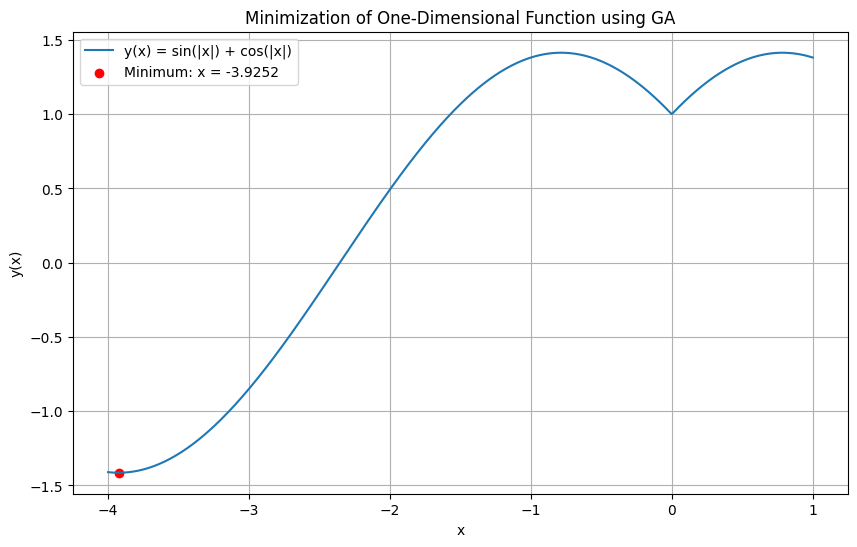

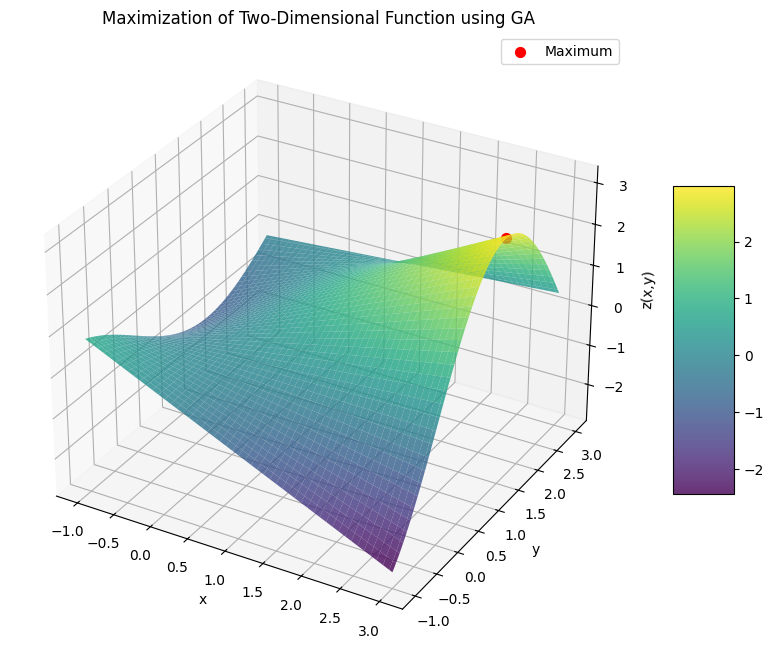

In [7]:
    # GA parameters
    POP_SIZE = 10
    N_GEN = 100
    SEED = 42

    # 1) Minimization of the 1D function
    best_1d = main_ga_1d(pop_size=POP_SIZE, n_gen=N_GEN, seed=SEED)

    # 2) Maximization of the 2D function
    best_2d = main_ga_2d(pop_size=POP_SIZE, n_gen=N_GEN, seed=SEED)

    # Plotting the functions and results
    plot_1d_function(best_1d, n_gen=N_GEN)
    plot_2d_function(best_2d, n_gen=N_GEN)